<a href="https://colab.research.google.com/github/khansakib68/Fruits_vegetables_recognition_system/blob/main/fruits_vegetables_recognition_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Data preprocessing0.
TRAINING DATA PREPROCESSING

In [ ]:
training_set1= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/project_unv/train', labels='inferred', label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size= 32, image_size=(64,64),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio= False


)

Found 3115 files belonging to 36 classes.


In [ ]:
validation_set1= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/project_unv/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 351 files belonging to 36 classes.


Model building

In [ ]:
cnn1 = tf.keras.models.Sequential()

convolution layer

In [ ]:
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
#cnn1.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
#cnn1.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting

In [ ]:
cnn1.add(tf.keras.layers.Flatten())

In [ ]:

cnn1.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn1.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn1.add(tf.keras.layers.Dropout(0.5))

0OUTPUT LAYER

In [ ]:
cnn1.add(tf.keras.layers.Dense(units=36, activation='softmax'))

compiling and training

In [ ]:
cnn1.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
training_history1=cnn1.fit(x=training_set1,validation_data=validation_set1,epochs=32)

Epoch 1/32
98/98 [==============================] - 576s 5s/step - loss: 6.3507 - accuracy: 0.0327 - val_loss: 3.5803 - val_accuracy: 0.0256
Epoch 2/32
98/98 [==============================] - 163s 2s/step - loss: 3.5751 - accuracy: 0.0337 - val_loss: 3.5271 - val_accuracy: 0.0712
Epoch 3/32
98/98 [==============================] - 157s 2s/step - loss: 3.5490 - accuracy: 0.0427 - val_loss: 3.5651 - val_accuracy: 0.0456
Epoch 4/32
98/98 [==============================] - 163s 2s/step - loss: 3.4711 - accuracy: 0.0578 - val_loss: 3.4080 - val_accuracy: 0.0741
Epoch 5/32
98/98 [==============================] - 151s 1s/step - loss: 3.3433 - accuracy: 0.0764 - val_loss: 3.1372 - val_accuracy: 0.1339
Epoch 6/32
98/98 [==============================] - 155s 2s/step - loss: 3.1686 - accuracy: 0.1133 - val_loss: 2.8681 - val_accuracy: 0.1880
Epoch 7/32
98/98 [==============================] - 150s 1s/step - loss: 2.9770 - accuracy: 0.1650 - val_loss: 2.6652 - val_accuracy: 0.2934
Epoch 8/32
98

saving models

In [ ]:
cnn1.save('trained_model2.h5')




/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


recording history

recording history in json

In [ ]:
import json
with open('training_hist.json','w') as f:
   json.dump(training_history1.history, f)

calculating accuracy of model achieved on validation set

In [ ]:
print(f'Validation set accuracy: {(training_history1.history["val_accuracy"][-1]*100)}')

Validation set accuracy: 93.16239356994629


accuracy visualization

training visualization

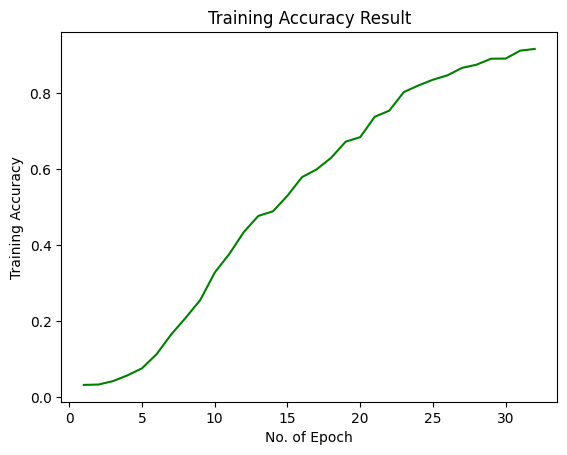

In [ ]:
epochs1= [i for i in range(1,33)]
plt.plot(epochs1,training_history1.history['accuracy'],color='green')
plt.xlabel('No. of Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Result')
plt.show()

Validation Accuracy

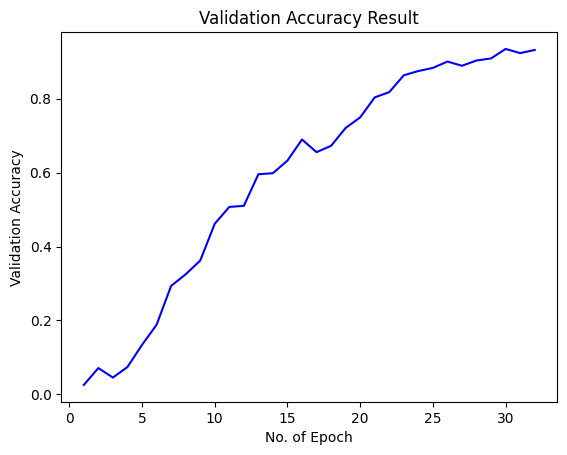

In [ ]:
plt.plot(epochs1,training_history1.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Result')
plt.show()

In [ ]:
training_loss , training_accuracy = cnn1.evaluate(training_set1)

98/98 [==============================] - 93s 864ms/step - loss: 0.2504 - accuracy: 0.9326


In [ ]:
validation_loss , validation_accuracy = cnn1.evaluate(validation_set1)

11/11 [==============================] - 13s 341ms/step - loss: 0.5950 - accuracy: 0.9316


In [ ]:
test_set1= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/project_unv/test', labels='inferred', label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size= 32, image_size=(64,64),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio= False


)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss , test_accuracy = cnn1.evaluate(test_set1)

12/12 [==============================] - 49s 869ms/step - loss: 0.5820 - accuracy: 0.9331
